In [1]:
!pip install gradio
import gradio
#only run this line once every time you start a colab instance
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.0 MB/s

In [2]:

import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_sample_weight

from imblearn.ensemble import BalancedRandomForestClassifier

#file directory for stored files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#importing data
df = pd.read_csv("/content/drive/My Drive/HW Files/CSI5810/projectCar/caravan.csv")
data = df.to_numpy()
column_titles = df.columns.to_numpy()

In [4]:
column_titles[45:]
#origin
data[:,]

array([['train', 33, 1, ..., 0, 0, 0],
       ['train', 37, 1, ..., 0, 0, 0],
       ['train', 37, 1, ..., 0, 0, 0],
       ...,
       ['test', 36, 1, ..., 1, 0, 0],
       ['test', 33, 1, ..., 0, 0, 0],
       ['test', 8, 1, ..., 0, 0, 0]], dtype=object)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#**Preprocessing & Feature Selection**
---------
Below we need show how the data distributed in a series of historgrams to understand the underlying distribuitions

Since the data came to us preprocesses and all attributes are ordinal or classes, we can reduce this problem down to one of classificaiton. So we will not be normalizing the data. (We will try the models with normalized data later on just to verify this is the case)

All data has already been encoded for us the keys are provided on the kaggle page.

In [6]:
selected_columns = np.r_[1:43, 58, 64]
m = np.array(np.where(data[:,-1:] == 1))[0,:]
train_data = data[np.array(np.where(data[:,0] == "train" ))[0,:],:]
x_train = train_data[:,selected_columns].astype('int')
y_train = train_data[:,-1:].flatten().astype('int')
print(train_data.shape)
test_data = data[np.array(np.where(data[:,0] == "test" ))[0,:],:]
x_test = test_data[:,selected_columns].astype('int')
y_test = test_data[:,-1:].flatten().astype('int')
print(test_data.shape)

(5822, 87)
(4000, 87)


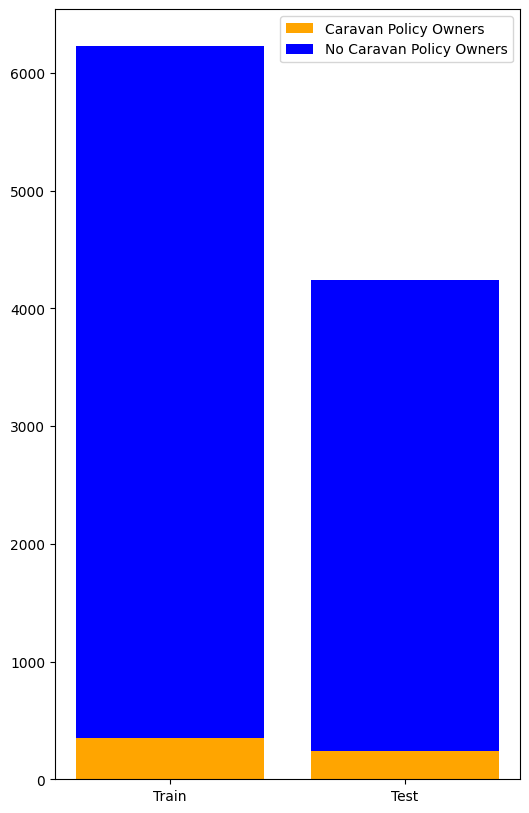

In [7]:

groups = np.array(["Train", "Test"])
counts = np.array([5882,4000])
counts_true = np.array([348,238])

fig, ax = plt.subplots(figsize=(6,10))
ax.bar(groups, counts_true, color = 'orange',label="Caravan Policy Owners")
ax.bar(groups, counts, bottom = counts_true, color = 'blue', label = "No Caravan Policy Owners")
ax.legend()


In [8]:
print(np.array(np.where(y_train == 1)).flatten().shape[0]) # look at the distribution of classes in data

348


In [9]:
x_train.shape

(5822, 44)

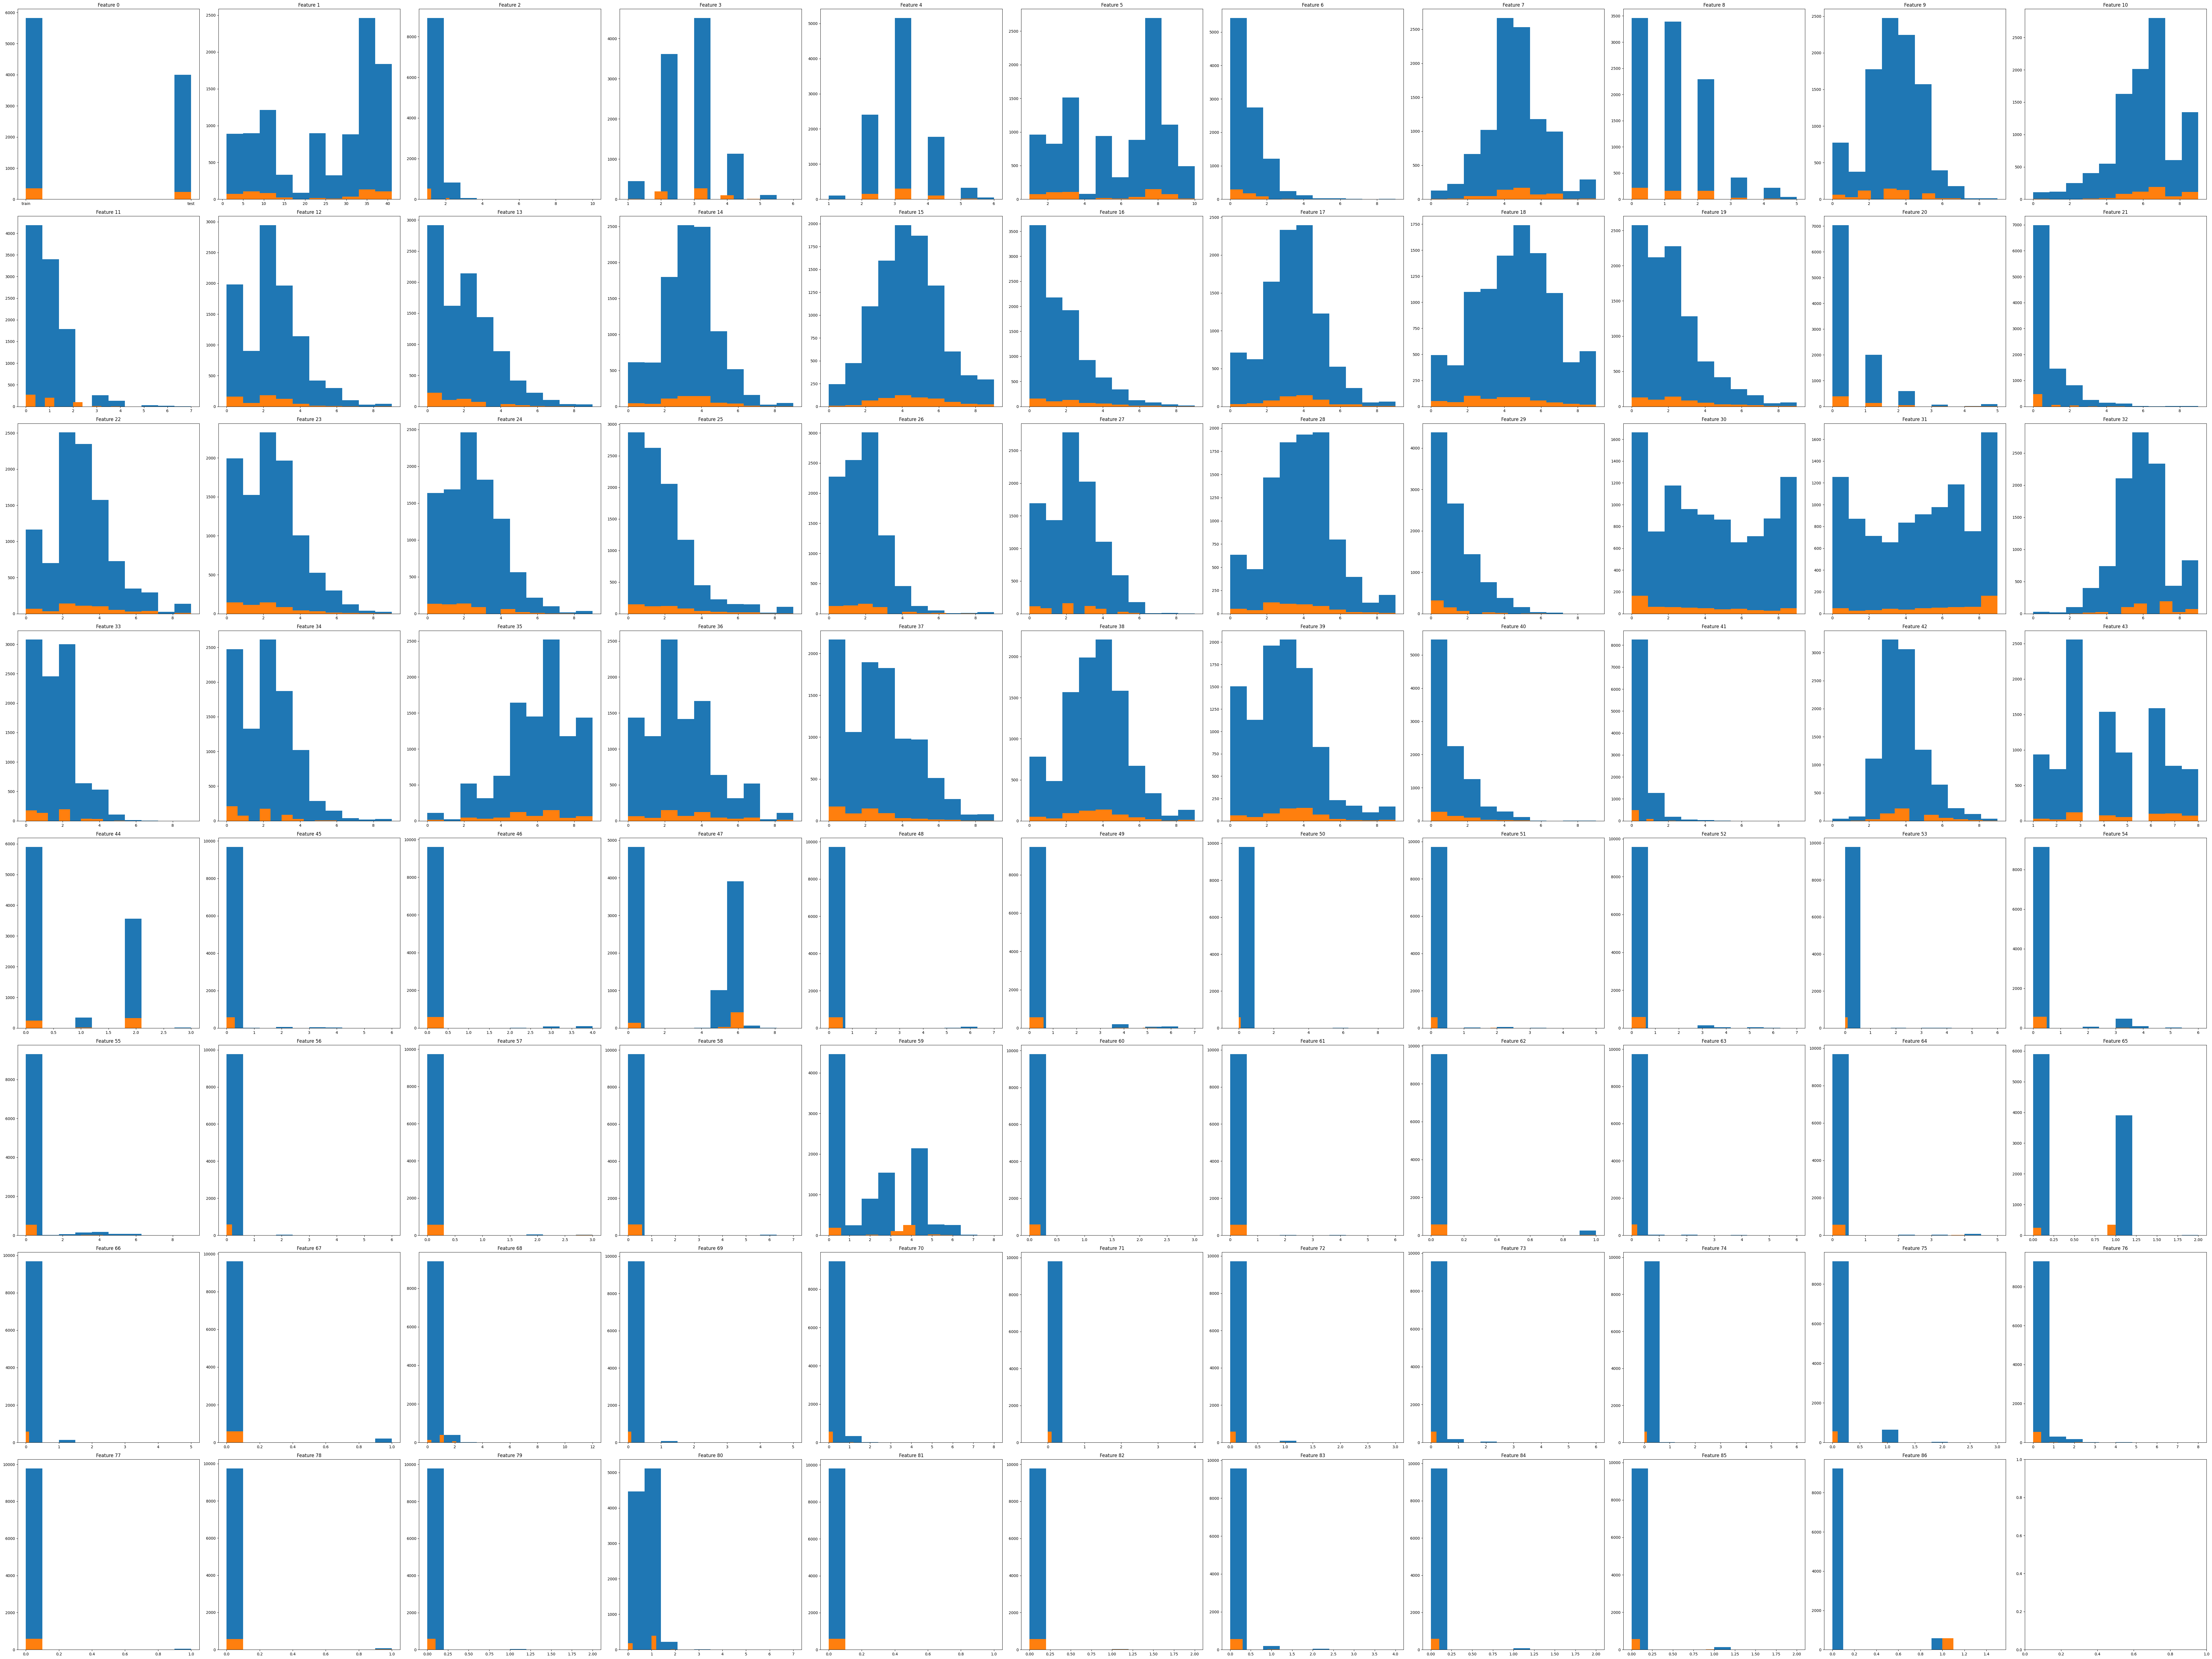

In [10]:
fig, axs = plt.subplots(8,11, figsize=(80,60))
m = np.array(np.where(data[:,-1:] == 1))[0,:]
for i in range(8):
  for j in range(11):
    k=i*11+j
    if k < 87:
      axs[i][j].hist(data[:,k])
      axs[i][j].hist(data[m,k])
      axs[i][j].set_title(f"Feature {k}")

plt.tight_layout()

#**Classifier models**
--------
This model is the basic implementations of the decision tree, random forest, mulitnomial nb, bagger classifier. Just as in the competition we will only be performing on the training data (which will have a small subset for verification). Then once the best trees are found we will perform on the test set.

We use Nfold-cross verification to measure out our metrics for the various models.

In [11]:
epochs = 10

def treeModel(depth):
    model = tree.DecisionTreeClassifier(criterion="gini",random_state=22,splitter="best",max_depth= depth, class_weight="balanced")
    return model

def randomForest(estimators):
  model = ensemble.RandomForestClassifier(n_estimators= estimators,max_depth = 3,random_state=22,class_weight="balanced")
  return model

def bForest(estimators):
  return BalancedRandomForestClassifier(n_estimators=estimators,class_weight="balanced",max_depth=20)

def mNB():
  return naive_bayes.MultinomialNB(alpha=.05)

def bg(est):
  return ensemble.BaggingClassifier(n_estimators=est,random_state = 22)

def logReg():
  return linear_model.LogisticRegression()

def goob():
  #categorical_features=np.ones(x_test.shape[1], dtype=bool),
  model = ensemble.HistGradientBoostingClassifier(learning_rate=.05,max_depth=10,random_state=22,class_weight="balanced",scoring="recall")
  return model

def cNB():
  return naive_bayes.CategoricalNB()
def nFoldV(model, splits=10):
    kf = model_selection.KFold(n_splits=splits, shuffle=True, random_state=22)
    scores = []

    for train_index, test_index in kf.split(x_train):
        X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)
        score = metrics.accuracy_score(y_test_fold, y_pred)

        dump = metrics.classification_report(y_test_fold,y_pred)
        scores.append(score)
    #print(dump, "\n-------------------------------\n")
    return scores, np.std(scores), np.mean(scores)

def class_metrics(model):
  print("-----------------------------------------------\n",metrics.classification_report(model.fit(x_train,y_train).predict(x_test),y_test))
  confusion2, stds,measn = nFoldV(model)
  print(f"Std_Dev: {stds} | Mean Accuracy{measn}\n-----------------------------------------------")
  return


In [12]:

for i in range(10):
  print(f"+++++++++++++++++++++++depth {(i+1)}+++++++++++++++++++++++")
  class_metrics(treeModel(i+1))

print("\n\n\n\n\n=========================================\n=========================================\n\n\n\n\n")
for i in range(20):
  print(f"[][][][][][][][[[][{i+1}][][][][][][][]]]")
  rfmodel = randomForest(i+1)
  y_pred = class_metrics(rfmodel)




print("\n\n\n\n\n=========================================\n=========================================\n\n\n\n\n")
class_metrics(mNB())
print("\n\n\n\n\n=========================================\n=========================================\n\n\n\n\n")
class_metrics(goob())
#class_metrics(bg(20))
#class_metrics(goob())




+++++++++++++++++++++++depth 1+++++++++++++++++++++++
-----------------------------------------------
               precision    recall  f1-score   support

           0       0.46      0.96      0.62      1801
           1       0.68      0.07      0.13      2199

    accuracy                           0.47      4000
   macro avg       0.57      0.52      0.38      4000
weighted avg       0.58      0.47      0.35      4000

Std_Dev: 0.0240148624711724 | Mean Accuracy0.4852283779243515
-----------------------------------------------
+++++++++++++++++++++++depth 2+++++++++++++++++++++++
-----------------------------------------------
               precision    recall  f1-score   support

           0       0.66      0.96      0.78      2580
           1       0.52      0.09      0.15      1420

    accuracy                           0.65      4000
   macro avg       0.59      0.52      0.46      4000
weighted avg       0.61      0.65      0.55      4000

Std_Dev: 0.052631290707365684 

In [13]:
class_metrics(goob())

-----------------------------------------------
               precision    recall  f1-score   support

           0       0.75      0.95      0.84      2950
           1       0.41      0.09      0.15      1050

    accuracy                           0.73      4000
   macro avg       0.58      0.52      0.49      4000
weighted avg       0.66      0.73      0.66      4000

Std_Dev: 0.014699359946208572 | Mean Accuracy0.7322272520969273
-----------------------------------------------


In [14]:
#Results of tree models
#this module isn't working the random forest added the attriute for max depth
tree_scores, tree_std, tree_mean = nFoldV(treeModel(10))
mNB_scores, mNB_std, mNB_mean = nFoldV(mNB())
logReg_scores, logReg_std, logReg_mean = nFoldV(logReg())
rf_std = []
rf_mean = []
bg_std = []
bg_mean = []
for j in range(epochs):
  i = 10 * j
  if i == 0: i = 1
  print(f"calculating rf,bg for iteriation {i}")
  randomForestModel = randomForest(i)
  bgModel = bg(i)
  rf_scores, rf_std_t, rf_mean_t = nFoldV(randomForestModel)
  bg_scores, bg_std_t, bg_mean_t = nFoldV(bgModel)
  rf_std.append(rf_std_t)
  rf_mean.append(rf_mean_t)
  bg_std.append(bg_std_t)
  bg_mean.append(bg_mean_t)
  #print(f"\n----------current rates[{i}]: \nrf_std={rf_std_t}\nrf_mean={rf_mean_t}\n-----\nbg_stg={bg_std_t}\nbg_mean={bg_mean_t}\n")


print("\n ")

calculating rf,bg for iteriation 1
calculating rf,bg for iteriation 10
calculating rf,bg for iteriation 20
calculating rf,bg for iteriation 30
calculating rf,bg for iteriation 40
calculating rf,bg for iteriation 50
calculating rf,bg for iteriation 60
calculating rf,bg for iteriation 70
calculating rf,bg for iteriation 80
calculating rf,bg for iteriation 90

 


logistic Regression produced the following metrics: accuracy mean 0.9402277000701431, accuracy standard deviation 0.00860777024180872
Tree model produced the following metrics: accuracy mean 0.6200630109694494, accuracy standard deviation 0.018675653008925982
mNB model produced the following metrics: accuracy mean 0.7384092824765845, accuracy standard deviation 0.02449316960868548


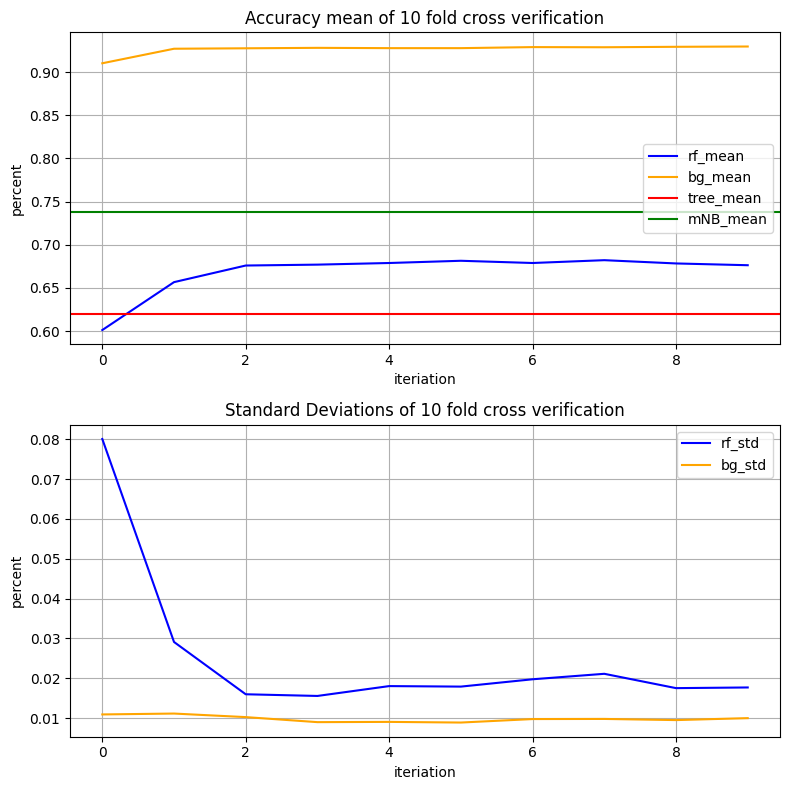

In [15]:
print(f"logistic Regression produced the following metrics: accuracy mean {logReg_mean}, accuracy standard deviation {logReg_std}")
print(f"Tree model produced the following metrics: accuracy mean {tree_mean}, accuracy standard deviation {tree_std}")
print(f"mNB model produced the following metrics: accuracy mean {mNB_mean}, accuracy standard deviation {mNB_std}")

fig, plots = plt.subplots(2, 1, figsize=(8, 8))
plots[0].plot(rf_mean,label = "rf_mean", linestyle="-", color="b")
plots[0].plot(bg_mean,label = "bg_mean", linestyle="-", color="orange")
plots[0].axhline(y = tree_mean, label = "tree_mean",color = 'red', linestyle = '-')
plots[0].axhline(y = mNB_mean, label="mNB_mean",color = 'green', linestyle = '-')
plots[0].set_title("Accuracy mean of 10 fold cross verification")
plots[0].set_xlabel("iteriation")
plots[0].set_ylabel("percent")
plots[0].grid(True)
plots[0].legend()


plots[1].set_title("Standard Deviations of 10 fold cross verification")
plots[1].plot(rf_std,label = "rf_std", linestyle="-", color="b")
plots[1].plot(bg_std,label = "bg_std", linestyle="-", color="orange")
#plots[1].axhline(y = tree_mean, label = "tree_std",color = 'red', linestyle = '-')
#plots[1].axhline(y = mNB_mean, label="mNB_std",color = 'green', linestyle = '-')
plots[1].legend()
#plots[1].set_yscale('log',base=2)
plots[1].set_xlabel("iteriation")
plots[1].set_ylabel("percent")
plots[1].grid(True)
plt.tight_layout()
plt.show()

(0.12453077011235074, 0.11985443150604143, 0.053380474837933935, 0.04097572577179294, 0.039937627874856337, 0.03781038343572852, 0.03668661913063235, 0.031119788665259246, 0.03091459963838845, 0.02988204252125305, 0.029437119248810224, 0.028039468506124352, 0.027936379680962763, 0.025558398383241, 0.02514010926611568, 0.0242698325411353, 0.023649613899750933, 0.02350419952225436, 0.02071560871978551, 0.019121759892546754, 0.01893796298268077, 0.018158389147551385, 0.0175906767820135, 0.017333072757150937, 0.015492331159153022, 0.015339266247896218, 0.012706758954486544, 0.012458520894328837, 0.010782329829466, 0.010776161415978924, 0.010475407269638769, 0.010328013333158286, 0.008587687474586604, 0.007620789795407853, 0.0075791599584600815, 0.00402153051118231, 0.0038161865577060554, 0.003460820285150217, 0.0011561175057686526, 0.000778638202552724, 0.00013522578071743386, 7.859679484628906e-16, 1.257548717540625e-16, 2.5586489058185908e-17)


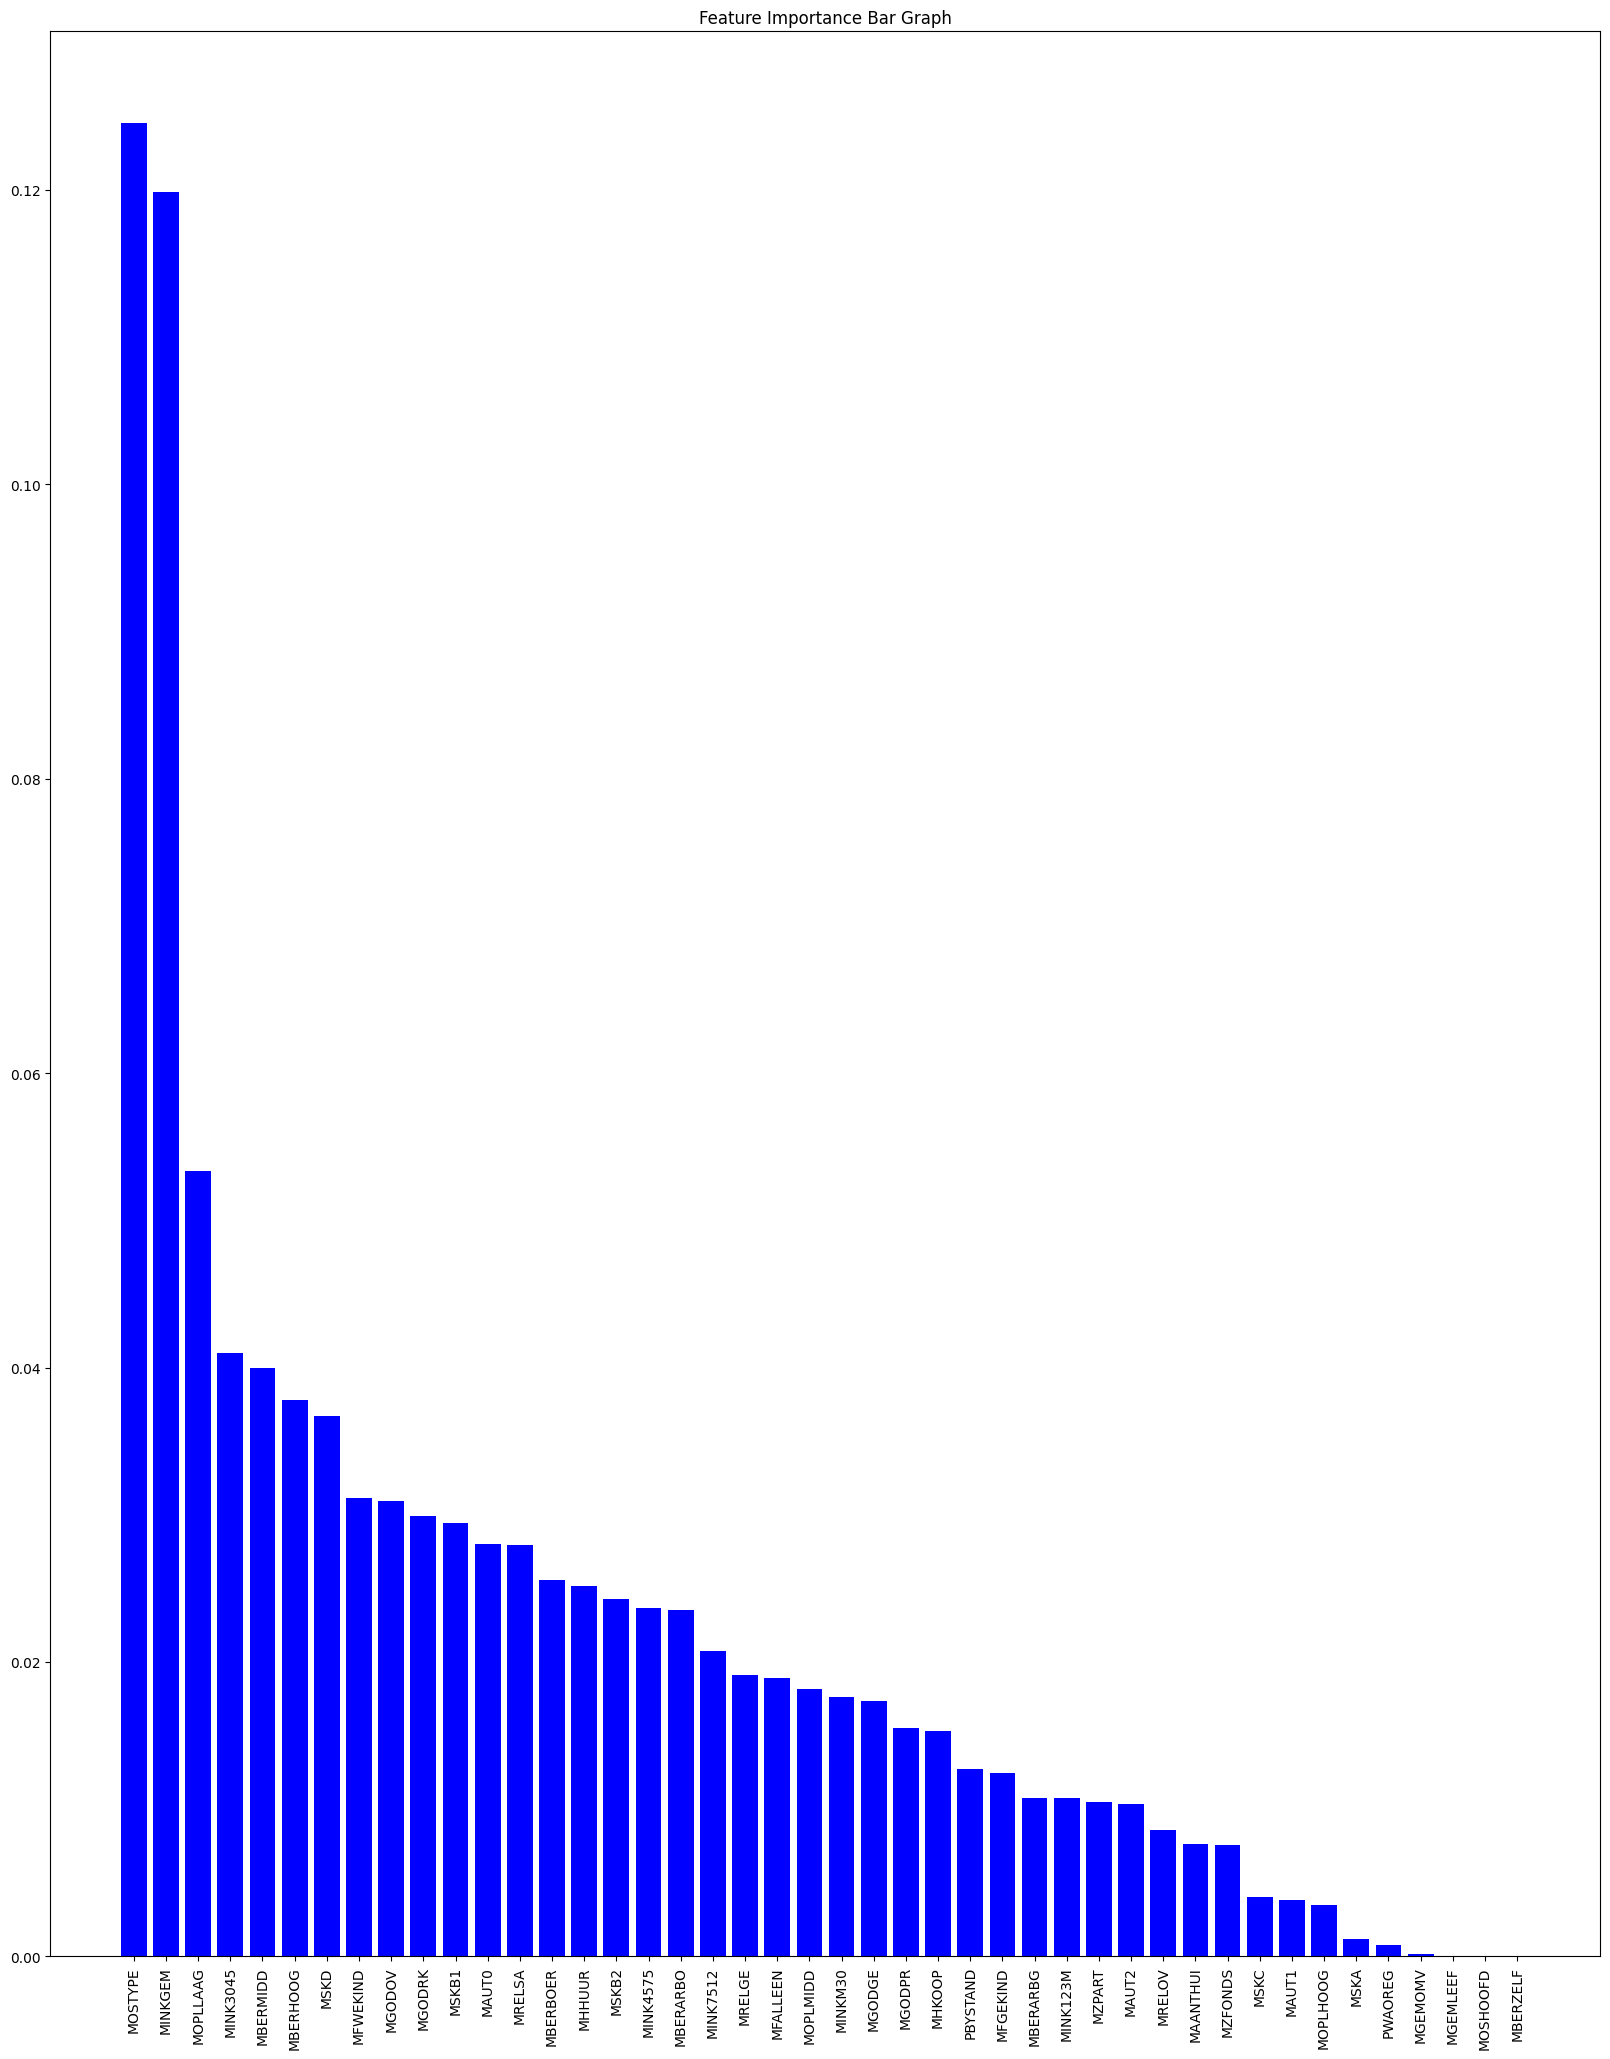

In [16]:
import_score = treeModel(10).fit(x_train,y_train).feature_importances_
importance_sorted = sorted(zip(column_titles[selected_columns], import_score), key=lambda x: x[1], reverse=True)

# Unpack the sorted results into separate lists
sorted_features, sorted_scores = zip(*importance_sorted)
print(sorted_scores)
plt.figure(figsize=(20, 25))
plt.bar(sorted_features,sorted_scores, color='blue')
plt.title('Feature Importance Bar Graph')
plt.xticks(rotation=90)
plt.show()

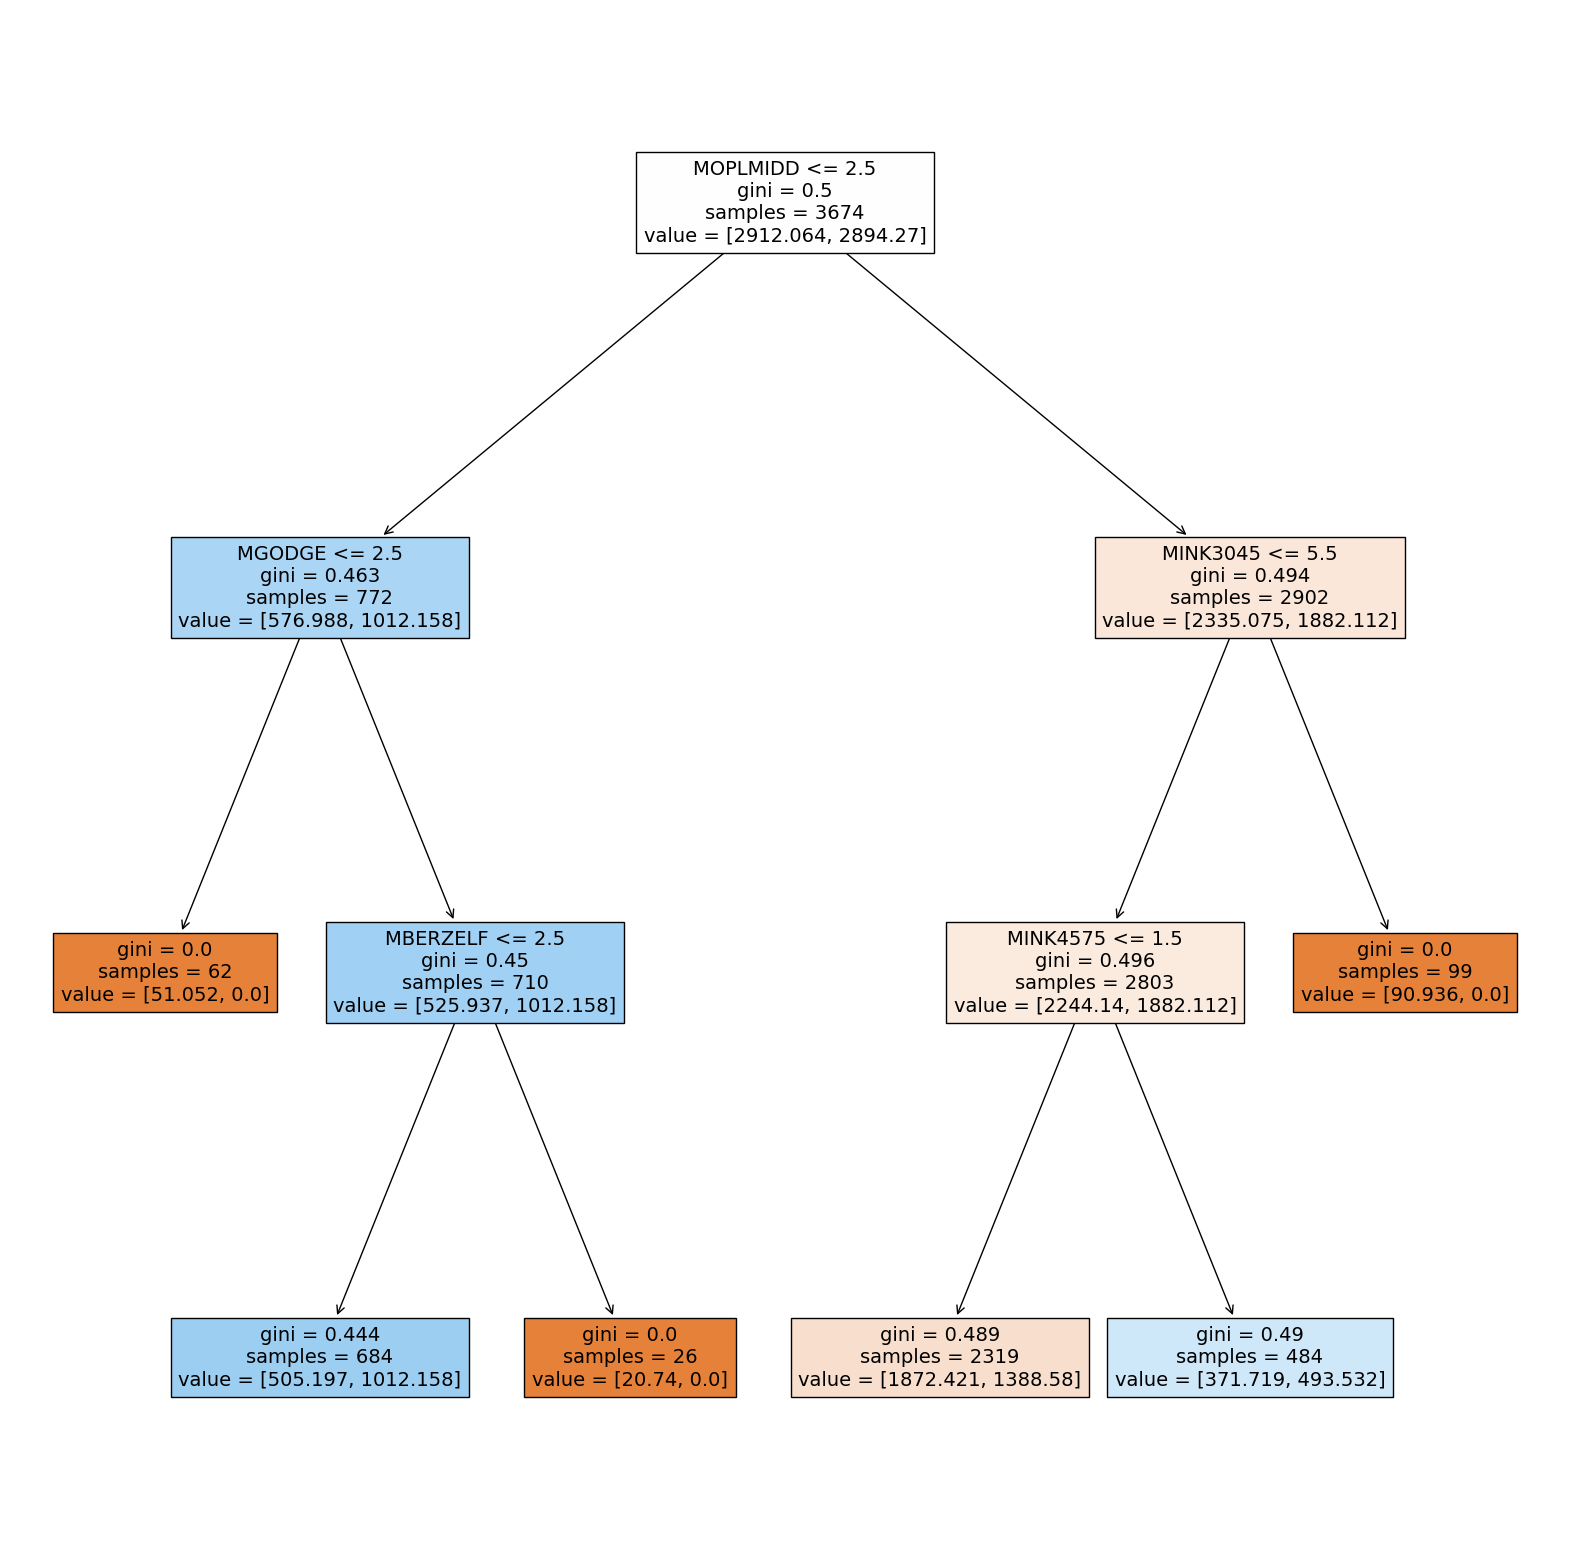

In [17]:
#don't pay attetion to this module i tried and failed to plot the entire random forest tree, it only plots part of it

from sklearn.tree import plot_tree

model = randomForest(5).fit(x_train,y_train)
plt.figure(figsize=(20,20))
plot_tree(model.estimators_[0], feature_names=column_titles, filled=True)
plt.show()

In [18]:
def build_database():
  data_temp=data[:,6:-1].astype(int)
  data_u_rows, data_indxs,data_counts = np.unique(data_temp[:,6:], axis = 0,return_index = True,return_counts=True)

  database = data[data_indxs, 6:]
  print(database)
  return database

In [19]:
postal_db = build_database()

[[2 5 0 ... 0 1 1]
 [0 7 2 ... 0 0 0]
 [0 7 2 ... 0 0 0]
 ...
 [0 5 5 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [0 5 0 ... 0 0 0]]


In [86]:
def predict(cust_subtype, num_Houses, house_size, avgAge, cust_mainType, area_code):
  cust_subtype = int(cust_subtype.split(":")[0])
  avgAge = int(avgAge.split(":")[0])
  cust_mainType = int(cust_mainType.split(":")[0])
  area_code = int(area_code)
  entry = np.array([cust_subtype, num_Houses, house_size, avgAge, cust_mainType])

  for l in postal_db[area_code]:
    entry = np.append(entry,l)
  prediction = model.predict(entry[:44].reshape(1, -1))
  if prediction[0] == 1:
    prediction ="Suspected Caravan Insurance Policy Holder"
  else:
    prediction ="Suspected to not have a Caravan Insurance Policy"
  return prediction

In [83]:
predict("1: High Income, expensive child",1,1,"1: 20-30 years","1: Successful hedonists",2)

[1 1 1 1 1]


'Suspected Caravan Insurance Policy Holder'

In [92]:
demo = gradio.Interface(fn=predict, inputs=[gr.Dropdown(["1: High Income, expensive child",
                                                         "2: Very Important Provincials",
                                                         "3: High status seniors",
                                                         "4: Affluent senior apartments",
                                                         "5: Mixed seniors",
                                                         "6: Career and childcare",
                                                         "7: Dinkis (double income no kids)",
                                                         "8: Middle class families",
                                                         "9: Modern, complete families",
                                                         "10: Stable family",
                                                         "11: Family starters",
                                                         "12: Affluent young families",
                                                         "13: Young all american family",
                                                         "14: Junior cosmopolitan",
                                                         "15: Senior cosmopolitans",
                                                         "16: Students in apartments",
                                                         "17: Fresh masters in the city",
                                                         "18: Single youth",
                                                         "19: Suburban youth",
                                                         "20: Etnically diverse",
                                                         "21: Young urban have-nots",
                                                         "22: Mixed apartment dwellers",
                                                         "23: Young and rising",
                                                         "24: Young, low educated",
                                                         "25: Young seniors in the city",
                                                         "26: Own home elderly",
                                                         "27: Seniors in apartments",
                                                         "28: Residential elderly",
                                                         "29: Porchless seniors: no front yard",
                                                         "30: Religious elderly singles",
                                                         "31: Low income catholics",
                                                         "32: Mixed seniors",
                                                         "33: Lower class large families",
                                                         "34: Large family, employed child",
                                                         "35: Village families",
                                                         "36: Couples with teens Married with children",
                                                         "37: Mixed small town dwellers",
                                                         "38: Traditional families",
                                                         "39: Large religous families",
                                                         "40: Large family farms",
                                                         "41: Mixed rurals"],label = "Customer_subtype"),
                                            gradio.Slider(1,6,label="Number of houses",step = 1),gradio.Slider(1,6,label="average size of house",step = 1),gradio.Dropdown([
                                                "1: 20-30 years",
                                                "2: 30-40 years",
                                                "3: 40-50 years",
                                                "4: 50-60 years",
                                                "5: 60-70 years",
                                                "6: 70-80 years"],label="Average Age"),
                                                gradio.Dropdown(["1: Successful hedonists",
                                                                  "2: Driven Growers",
                                                                  "3: Average Family",
                                                                  "4: Career Loners",
                                                                  "5: Living well",
                                                                  "6: Cruising Seniors",
                                                                  "7: Retired and Religeous",
                                                                  "8: Family with grown ups",
                                                                  "9: Conservative families",
                                                                  "10: Farmers"],label = "Customer main Type"),
                                            'text'], outputs = "text")


In [94]:
demo.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://35d37fb107ed8d3d52.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
